In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../../results/resultados_weak_supervision.csv')

In [3]:
df_label = pd.read_csv('../../data/y_train_fakes.csv')

In [5]:
df.label.value_counts()

label
YES\n        2817
ABSTAIN\n     982
NO\n          650
Name: count, dtype: int64

In [7]:
df['label'] = df['label'].str.rstrip('\n')

In [8]:
df_pivot = df.pivot(index = 'artigo', columns='sinal_credibilidade',values='label')

In [9]:
color_map = {'YES': 1, 'NO': -1, 'ABSTAIN': 0}
numeric_df = df_pivot.replace(color_map)

C:\Users\rafae\AppData\Local\Temp\ipykernel_3108\2413569000.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_df = df_pivot.replace(color_map)


In [10]:
cmap = sns.color_palette(['red', 'white', 'green'], as_cmap=True)

In [11]:
numeric_df = numeric_df.reset_index()

In [12]:
numeric_df.drop(columns=['artigo'], inplace=True)

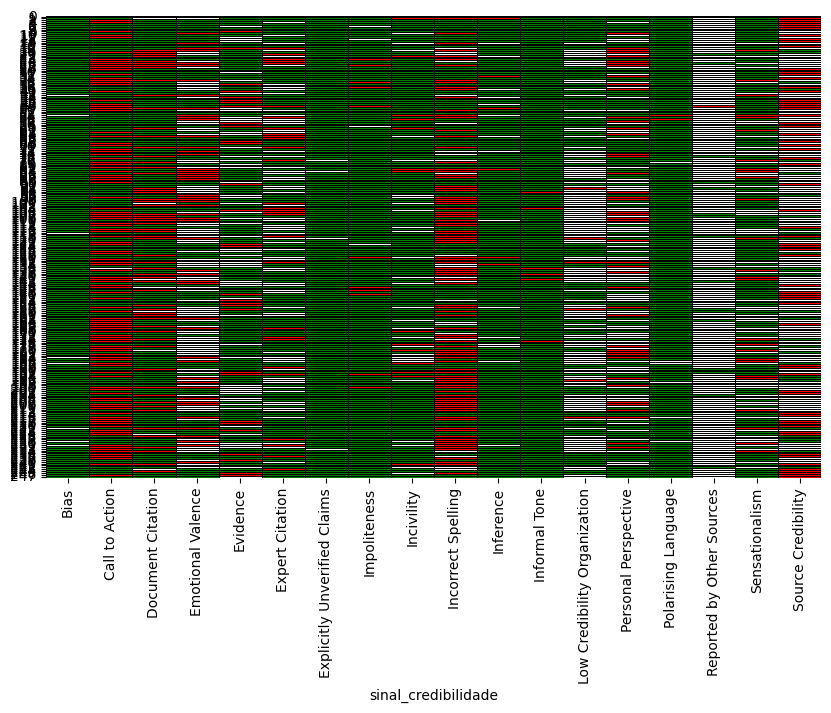

In [14]:
# Criando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    numeric_df[:300],
    cmap=cmap,
    cbar=False,  # Remove a barra de cor
    linewidths=0.5,  # Linhas entre as células
    linecolor='black',  # Cor das linhas
    xticklabels=True,
    yticklabels=True,
)

# Exibindo o gráfico
plt.show()

In [15]:
df_pivot.reset_index(inplace = True)

In [16]:
artigo_sample = df_pivot.sample(1,random_state=13).artigo.iloc[0]

In [17]:
df_pivot.sample(1,random_state=13)

sinal_credibilidade,artigo,Bias,Call to Action,Document Citation,Emotional Valence,Evidence,Expert Citation,Explicitly Unverified Claims,Impoliteness,Incivility,Incorrect Spelling,Inference,Informal Tone,Low Credibility Organization,Personal Perspective,Polarising Language,Reported by Other Sources,Sensationalism,Source Credibility
124,Fri Feb 27 2015 Syria Kurds Liberate Tel Hamis...,YES,YES,NO,ABSTAIN,YES,YES,YES,YES,YES,ABSTAIN,YES,YES,YES,ABSTAIN,YES,ABSTAIN,YES,ABSTAIN


In [18]:
print(df[df.artigo == artigo_sample].resposta.iloc[1])

The article presents a relatively neutral account of the military events, but some implicit biases might be present:

* **Framing of the YPG:** The article portrays the YPG favorably, using language like "liberate" and describing their actions as a "powerful offensive."  This positive framing could be considered a bias, especially if the article doesn't equally highlight potential negative actions or controversies surrounding the YPG.  A truly neutral article would present the YPG's actions without explicitly positive or negative connotations.

* **Focus on ISIS Casualties:** The article emphasizes the high number of ISIS casualties (175 killed). While reporting the number of deaths is factual, the prominence given to this statistic might implicitly portray the Kurdish victory as more significant than it might be if other aspects of the conflict were given equal weight.  A more balanced piece might also discuss the overall strategic implications of the battle beyond just the immediate 

# Montando um Modelo

In [19]:
df_pivot

sinal_credibilidade,artigo,Bias,Call to Action,Document Citation,Emotional Valence,Evidence,Expert Citation,Explicitly Unverified Claims,Impoliteness,Incivility,Incorrect Spelling,Inference,Informal Tone,Low Credibility Organization,Personal Perspective,Polarising Language,Reported by Other Sources,Sensationalism,Source Credibility
0,01.02.2015 A bus blast in Damascus central dis...,YES,NO,ABSTAIN,NO,YES,ABSTAIN,YES,YES,YES,YES,YES,YES,YES,ABSTAIN,YES,YES,YES,ABSTAIN
1,01.10.2014 A double terrorist attack in the we...,YES,YES,ABSTAIN,ABSTAIN,YES,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES,ABSTAIN,YES,NO
2,03-07-2015 Five Civilians Killed in Terrorist ...,YES,NO,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,ABSTAIN,YES,NO
3,03-08-2016 Chemical Attack Kills Five Syrians ...,YES,NO,YES,YES,YES,ABSTAIN,YES,YES,YES,YES,YES,YES,YES,ABSTAIN,YES,ABSTAIN,YES,NO
4,04-03-2016 2 Syrians killed 5 Injured in Terro...,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,ABSTAIN,YES,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Wednesday 24 August 2016 16:58 Syrian Coalitio...,YES,YES,ABSTAIN,YES,YES,NO,YES,YES,YES,ABSTAIN,YES,YES,ABSTAIN,YES,YES,ABSTAIN,YES,NO
244,Wednesday 26 November 2014 10:07 Assads Air Fo...,YES,YES,NO,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,ABSTAIN,YES,NO
245,Wednesday 26 October 2016 26 People Killed in ...,YES,YES,YES,YES,NO,YES,YES,YES,ABSTAIN,NO,YES,YES,YES,YES,YES,ABSTAIN,YES,NO
246,Wednesday 30 November 2016 14:28 54 Killed in ...,YES,NO,YES,YES,NO,YES,YES,YES,YES,YES,YES,YES,ABSTAIN,YES,YES,ABSTAIN,YES,NO


In [20]:
pd.concat([df_pivot, df_label], axis=1)

,artigo,Bias,Call to Action,Document Citation,Emotional Valence,Evidence,Expert Citation,Explicitly Unverified Claims,Impoliteness,Incivility,Incorrect Spelling,Inference,Informal Tone,Low Credibility Organization,Personal Perspective,Polarising Language,Reported by Other Sources,Sensationalism,Source Credibility,label
0,01.02.2015 A bus blast in Damascus central dis...,YES,NO,ABSTAIN,NO,YES,ABSTAIN,YES,YES,YES,YES,YES,YES,YES,ABSTAIN,YES,YES,YES,ABSTAIN,1
1,01.10.2014 A double terrorist attack in the we...,YES,YES,ABSTAIN,ABSTAIN,YES,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES,ABSTAIN,YES,NO,1
2,03-07-2015 Five Civilians Killed in Terrorist ...,YES,NO,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,ABSTAIN,YES,NO,0
3,03-08-2016 Chemical Attack Kills Five Syrians ...,YES,NO,YES,YES,YES,ABSTAIN,YES,YES,YES,YES,YES,YES,YES,ABSTAIN,YES,ABSTAIN,YES,NO,1
4,04-03-2016 2 Syrians killed 5 Injured in Terro...,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,ABSTAIN,YES,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
